<a href="https://colab.research.google.com/github/suriyanrk/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **Introducation**

**Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic  is positive, negative, or neutral.**

**COVID-19 originally known as Coronavirus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020.**

**The study analyzes various types of tweets gathered during the pandemic times hence can be useful in policy making to safeguard the countries by demystifying the pertinent facts and information.**


## **Importing Libraries** 

In [164]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence 
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [165]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
path='/content/drive/MyDrive/Capestone/Coronavirus Tweet Sentiment Analysis/Data & Resources/Coronavirus Tweets.csv'

df=pd.read_csv(path,encoding='latin')

In [167]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative


In [168]:
df.shape

(41157, 6)

# **2. Reviewing Our Dataset/ Exploratory Data Analysis**

The original dataset has 6 columns and 41157 rows.

In order to analyse various sentiments, We require just two columns named Original Tweet and Sentiment.

There are four types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.

The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.

All tweets data collected from the months of March and April 2020.
Bar plot shows us the number of unique values in each column.

There are 20.87%(8567) null values in various places of location column.
Most of the tweets came from London followed by U.S.

There are some words like ‘coronavirus’,’grocery store’, having the maximum frequency in our dataset.

There are various #hashtags in tweets column.But they are almost same in all sentiments.

Most of the peoples are having positive sentiments about various issues shows us their optimism during pandemic times.

Very few people are having extremely negatives thoughts about Covid-19.




In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**There are null values in the dataset**

In [170]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [171]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

**There are 12220 unique Location**

In [172]:
# All tweets came only from March and April month of 2020.
df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

## Analyzing the Tweets

**Extremely Negative**

In [173]:
df.loc[df['Sentiment']=='Extremely Negative',:]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Extremely Negative
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 the world must not play fair with china 100 goverments must demand china adopts new guilde lines on food safty the chinese goverment is guilty...,Extremely Negative
27,3826,48778,Everywhere You Are!,16-03-2020,"This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus. Stay home people and be pragmat...",Extremely Negative
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies unlawful Panicky people will be breaking into Closed Stores &amp; Supermarkets to Raid them as they normally do during a Crisis so massive as the #Coro...,Extremely Negative
42,3841,48793,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No food ? in USA market due to coronavirus panic we gonna die from starvation #CoronavirusOutbreak #coronavirus #houston #nofood #Notoiletpaper #NoHandShak...,Extremely Negative
...,...,...,...,...,...,...
41115,44914,89866,NaN,14-04-2020,"Food Banks are not equipped for a 30% unemployment rate. The federal government must provide direct aid to everyone, very quickly.\r\r\n\r\r\n""The Coronavirus Food Bank Crisis Is Already Underway""...",Extremely Negative
41128,44927,89879,"Melbourne, Australia",14-04-2020,"The COVID-19 pandemic and global oil price wars are having an economic impact worldwide, but one consequence is lower fuel prices at Australian petrol pumps for the foreseeable.\r\r\n\r\r\n#UniMel...",Extremely Negative
41130,44929,89881,NaN,14-04-2020,Squeo works in the meat department of a Kroger supermarket in Michigan. He knows of several grocery workers whoÂve tested positive for COVID-19 and one in his area who died. He worries that the b...,Extremely Negative
41133,44932,89884,Austria,14-04-2020,A Singaporean politician who slammed a woman snapped with seven supermarket trolleys during COVID-19 lockdown has been forced to eat humble pie after it turned out she was donating goods to the po...,Extremely Negative


In [174]:
df.loc[df['Sentiment']=='Extremely Negative','OriginalTweet'].head(1)

4    Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...
Name: OriginalTweet, dtype: object

**Negative**

In [175]:
df.loc[df['Sentiment']=='Negative',:]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our h...",Negative
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checko...,Negative
26,3825,48777,"Ketchum, Idaho",16-03-2020,"In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5Cec...",Negative
28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\...,Negative
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty shelves people see the more buying ensues the more food is out of stock,Negative
...,...,...,...,...,...,...
41127,44926,89878,NaN,14-04-2020,Today at the grocery store I saw someone getting a case of #Corona beer and I was about to jokingly say 'hey man i see you got Corona' then I stopped myself doing that thinking it would be the new...,Negative
41131,44930,89882,"Accra, Ghana",14-04-2020,"In every human affliction there are gainers and losers. In this case of Covid 19, the TELECOS are gaining beyond expectations. The level of internet being used at this moment is mind blowing. Gov...",Negative
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?? #COVID19 #coronavirus #toiletpaper,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,"Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .",Negative


In [176]:
df.loc[df['Sentiment']=='Negative','OriginalTweet'].head(1)

9    For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our h...
Name: OriginalTweet, dtype: object

**Neutral**

In [177]:
df.loc[df['Sentiment']=='Neutral',:]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral
10,3809,48761,"Makati, Manila",16-03-2020,"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a singl...",Neutral
16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https:...,Neutral
17,3816,48768,"Ontario, Canada",16-03-2020,"@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are ""observed""\r\r\nhttps://t.co/4WnrrK9oKC https:/...",Neutral
...,...,...,...,...,...,...
41141,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ??????? ?? ????? ???? ?? ?? ??? ??? ?? ??? ?? ??????? ???? ??? ???????????? @narendramodi ?? ??? ????? ?? ????? ???? ?? ????\r\r\n#ATCard #StayHome #Lockdown...,Neutral
41143,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUnido #cruiseships #SaveTheChildren #wuhan #BillGates?#SocialDistance #coronavirus is caused by #cellpoisoning from #radiation #cancer #exosomes #youcan...,Neutral
41144,44943,89895,NaN,14-04-2020,@_Sunrise_SV @Gamzap @NPR What does not having a supermarket nearby have to do with getting COVID-19?,Neutral
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral


**Positive**

In [178]:
df.loc[df['Sentiment']=='Positive',:]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and ot...",Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive
...,...,...,...,...,...,...
41140,44939,89891,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High Tech G&amp;G Online &amp; Live Course for Covid-19 effected Countries in very low prices. \r\r\nTitle: How to Approach Shale Reservoirs\r\r\nSpeaker: ...,Positive
41145,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York City if we still can't buy any hand sanitizer? #coronavirus,Positive
41146,44945,89897,"Gurgaon, India",14-04-2020,"#Gold prices rose to a more than 7-year high today due to #coronavirus increased bullion's #safe-haven appeal.\r\r\nIt gained 0.1% to $1,715.25/ounce , having touched its highest since Dec. 2012 a...",Positive
41150,44949,89901,OHIO,14-04-2020,"I never that weÂd be in a situation &amp; world that going to the supermarket , picking up a package or my mail is like playing Russian roulette with my life #coronavirus #StayHome #SocialDistancing",Positive


In [179]:
df.loc[df['Sentiment']=='Positive','OriginalTweet'].head()

1    advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...
2                                                                        Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P
3    My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...
5    As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and ot...
6                       Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I'm in Civics class so I know what I'm talking about".

**Extremely Positive**

In [180]:
df.loc[df['Sentiment']=='Extremely Positive',:]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,"#horningsea is a caring community. LetÂs ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolatio...",Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂAs COVID-19 has spread, weÂve seen a significant increase in people shopping online for groceries,Â a spokeswoman said in a sta...",Extremely Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Servi...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Servi...,Extremely Positive
...,...,...,...,...,...,...
41137,44936,89888,"LES, NYC",14-04-2020,Distilleries have switched portions of their production from alcohol to hand sanitizer to help with,Extremely Positive
41138,44937,89889,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right now. #weedsmokers #StonerFam #420 #bud #Gas #FullSend #Nelkboys #coronavirus #StimulusChecks #ListenToYourHeart https://t.co/mDMgkOQ8m3,Extremely Positive
41142,44941,89893,Juba south sudan,14-04-2020,@MajangChien @MTNSSD @MTNSSD is worst than COVID-19. All businesses have reduced their prices but our MTN is looting us instead of giving us free data.,Extremely Positive
41148,44947,89899,NaN,14-04-2020,"UV light Sterilizer Sanitizer for your mask and mobile phone ?, pls take care, be safe. #sanitizer #sanitizers #corona #coronavirus #coronavÃ­rus #coronavirÃ¼s https://t.co/v8XDXhqeYN",Extremely Positive


In [181]:
df.loc[df['Sentiment']=='Extremely Positive','OriginalTweet'].head()

11    Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\...
12    #horningsea is a caring community. LetÂs ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolatio...
18    Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂAs COVID-19 has spread, weÂve seen a significant increase in people shopping online for groceries,Â a spokeswoman said in a sta...
22    We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Servi...
23    We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM 

# Looking For Null Values

**Checking for null values in Sentiment and Tweets**

In [182]:
df['Sentiment'].isnull().sum()

0

In [183]:
df['OriginalTweet'].isnull().sum()

0

In [184]:
null_df=df.isnull().mean().reset_index().rename(columns={'index':'Features',0:'Average'}).sort_values('Average',ascending=False)
null_df

,Features,Average
2,Location,0.208713
0,UserName,0.000000
1,ScreenName,0.000000
3,TweetAt,0.000000
4,OriginalTweet,0.000000
5,Sentiment,0.000000


**Only Location column contains 20.8% null values. But this column is not useful for our sentiment analysis.**

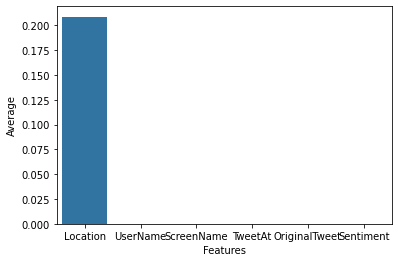

In [185]:
sns.barplot(null_df['Features'],null_df['Average'])

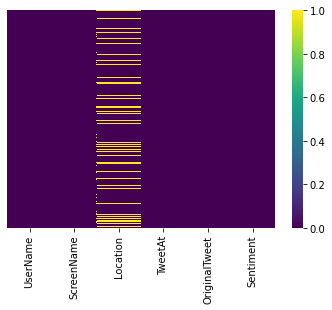

In [186]:
sns.heatmap(df.isna(),cbar=True, cmap='viridis',yticklabels=False)

# Unique Values In Each Feature Coulmn

In [187]:
feature=list(df.columns)
unique_dict={}
for feat in feature:
  unique_dict[feat]=df[feat].nunique()
unique=pd.Series(unique_dict.values(),index=unique_dict.keys()).sort_values()

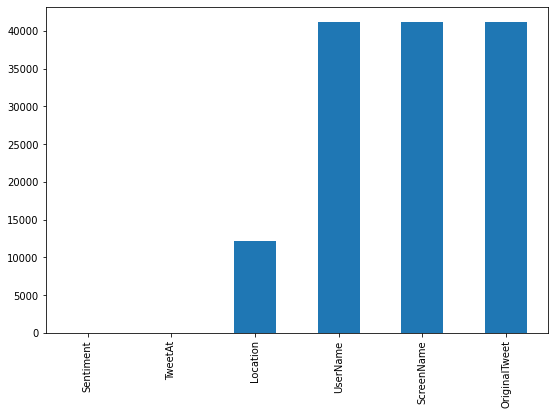

In [188]:
plt.figure(figsize=(9,6))
unique.plot(kind='bar')

# Plot Of Top 15 Locations Of Tweet.

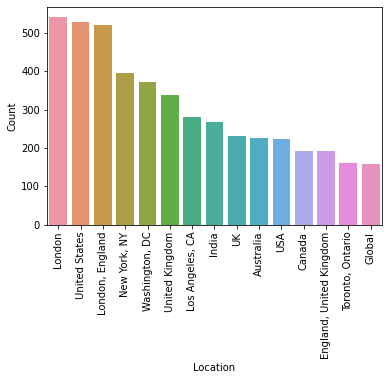

In [189]:
loc_df=df['Location'].value_counts().reset_index().rename(columns={'index':'Location','Location':'Count'}).sort_values('Count',ascending=False).head(15)
sns.barplot(loc_df['Location'],loc_df['Count'])
plt.xticks(rotation = 90)
plt.show()

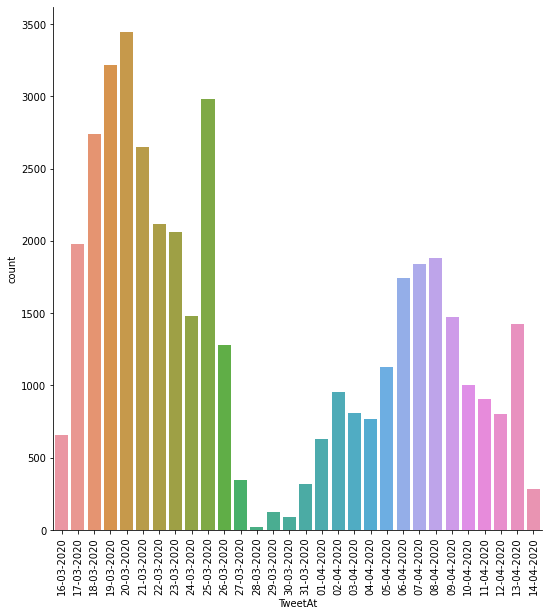

In [190]:
sns.catplot("TweetAt", data=df, kind="count", height=8)
plt.xticks(rotation = 90)
plt.show()

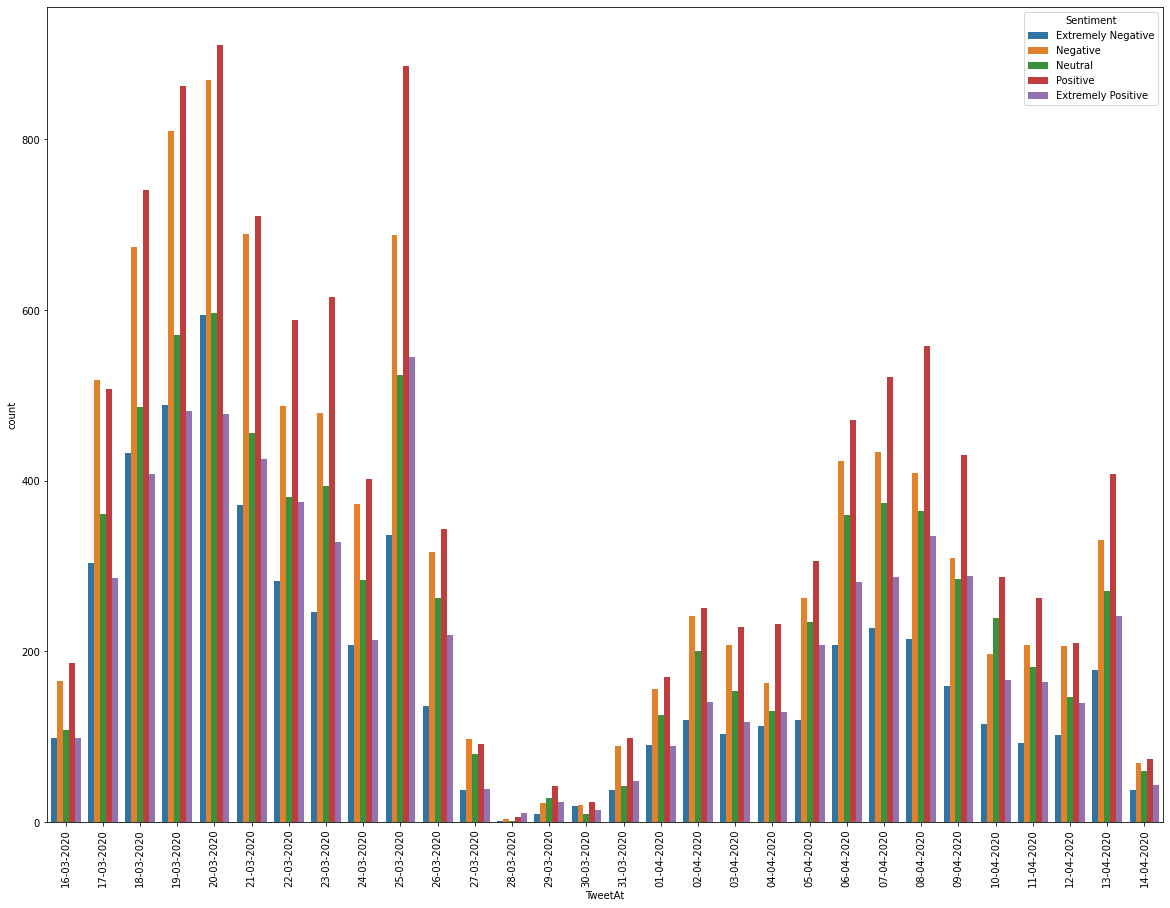

In [191]:
plt.figure(figsize=(20,15))
sns.countplot(df.TweetAt,hue=df.Sentiment,hue_order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
plt.xticks(rotation = 90)
plt.show()

# Sentiments Countplot

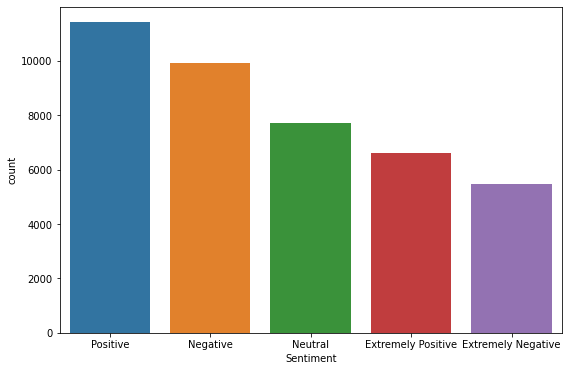

In [192]:
plt.figure(figsize=(9,6))
sns.countplot(df['Sentiment'],order=df['Sentiment'].value_counts().index)

# Data Preprocessing

The preprocessing of the text data is an essential step as it makes the raw text ready for mining.

The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

As mentioned earlier, the tweets contain lots of twitter handles (@user). We will remove all these twitter handles from the data as they don’t convey much information.

We have analyzed that most of the tweets are like #coronavirus #covid-19 and this tweets are almost present in all the sentiments. So there is no use of keeping these hashtags in text. It will make the data noisy and which will affect accuracy of model.

We are having twitter links in the data which are not useful for our
Model. It will make our data noisy.

As discussed, punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles,links and hashtags.

Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc.To remove stop words from a sentence, you can divide your text into words and then remove the word if it exits in the list of stop words provided by NLTK.

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “ed”, “s” etc) from a word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

Lemmatization is a more powerful operation, and it takes into consideration morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms.

In tokenization we convert group of sentence into token . It is also called text segmentation or lexical analysis. It is basically splitting data into small chunk of words.
Tokenization in python can be done by python NLTK library’s word_tokenize() function.


**1. Removing @user**

In [193]:
#function for removing @user
def remove_user(input_txt):
    user_pattern = '@[\w]*'
    r = re.findall(user_pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,' ',input_txt)
    return input_txt

In [194]:
# column with removed @user
df['Tweet'] = df['OriginalTweet'].apply(remove_user)

**REMOVED HTTP AND URLS FROM TWEET**

In [195]:
# Removing URLs
def remove_urls(text):
	url_pattern = r'https?://\S+|www\.\S+' 
	without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
	return without_urls

In [196]:
df['Tweet']=df['Tweet'].apply(remove_urls)

**2. Removing Punctuations, Numbers, and Special Characters**

In [197]:
# Removing special characters, numbers, punctuations
def remove_special(text):
	url_pattern = r'[^a-zA-Z#]+' 
	without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
	return without_urls

In [198]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].apply(remove_special)

In [199]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...


**3. Removing Short Words**

In [200]:
# remove short words
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [201]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...


In [202]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
stop_list=list(stopwords.words('english'))

# Removing StopWord
def Change_text(msg):
  main_text=[word for word in msg.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

In [204]:
df['Tweet'] = df['Tweet'].apply(Change_text)

In [205]:
df['Tweet']

0                                                                                                                                                                                                         
1        advice Talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds order
2                                                                                                      Coronavirus Australia Woolworths give elderly disabled dedicated shopping hours amid COVID outbreak
3                          food stock one empty PLEASE panic ENOUGH FOOD EVERYONE take need Stay calm stay safe #COVID france #COVID #COVID #coronavirus #confinement #Confinementotal #ConfinementGeneral
4                ready supermarket #COVID outbreak paranoid food stock litteraly empty #coronavirus serious thing please panic causes shortage #CoronavirusFrance #restezchezvous #StayAtHom

**4.Tokenization**

In [206]:
# create new variable tokenized tweet 
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [207]:
tokenized_tweet

0                                                                                                                                                                                                             []
1        [advice, Talk, neighbours, family, exchange, phone, numbers, create, contact, list, phone, numbers, neighbours, schools, employer, chemist, set, online, shopping, accounts, poss, adequate, supplie...
2                                                                                               [Coronavirus, Australia, Woolworths, give, elderly, disabled, dedicated, shopping, hours, amid, COVID, outbreak]
3        [food, stock, one, empty, PLEASE, panic, ENOUGH, FOOD, EVERYONE, take, need, Stay, calm, stay, safe, #COVID, france, #COVID, #COVID, #coronavirus, #confinement, #Confinementotal, #ConfinementGeneral]
4        [ready, supermarket, #COVID, outbreak, paranoid, food, stock, litteraly, empty, #coronavirus, serious, thing, please, panic, causes, shortage, #Coronavirus

**5.Stemming**

In [208]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [209]:
tokenized_tweet

0                                                                                                                                                                                                            []
1        [advic, talk, neighbour, famili, exchang, phone, number, creat, contact, list, phone, number, neighbour, school, employ, chemist, set, onlin, shop, account, poss, adequ, suppli, regular, med, order]
2                                                                                                           [coronaviru, australia, woolworth, give, elderli, disabl, dedic, shop, hour, amid, covid, outbreak]
3                    [food, stock, one, empti, pleas, panic, enough, food, everyon, take, need, stay, calm, stay, safe, #covid, franc, #covid, #covid, #coronaviru, #confin, #confinementot, #confinementgener]
4                   [readi, supermarket, #covid, outbreak, paranoid, food, stock, litterali, empti, #coronaviru, seriou, thing, pleas, panic, caus, shortag, #coronaviru

In [210]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [211]:
df['Tweet']=tokenized_tweet

# **Story Generation and Visualization from Tweets**

*  What are the most common words in the entire dataset?

*  What are the most common words in the dataset for negative and positive tweets, respectively?

*  How many hashtags are there in a tweet?

*  Which trends are associated with my dataset?

*  Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

A) **Understanding the common words used in the tweets: WordCloud**

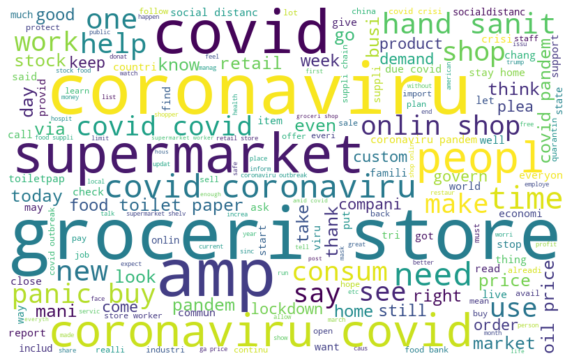

In [212]:
# create text from all tweets
all_words = ' '.join([str(text) for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,background_color="white", random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

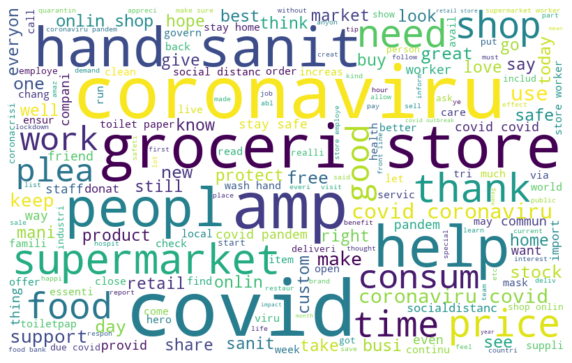

In [213]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['Tweet'][df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500,background_color="white", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

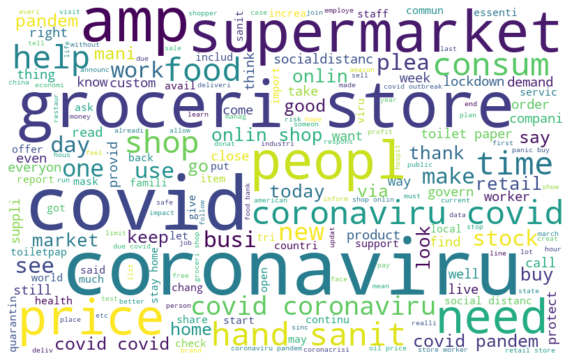

In [214]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['Tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500,background_color="white", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

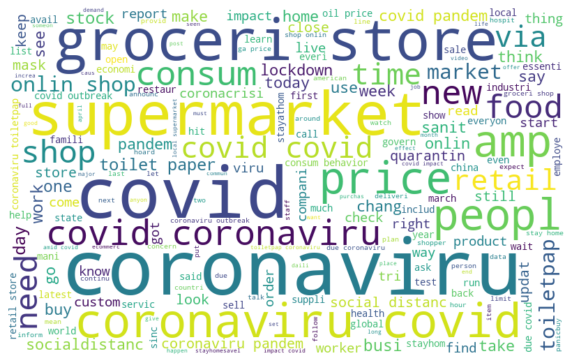

In [215]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['Tweet'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500,background_color="white", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

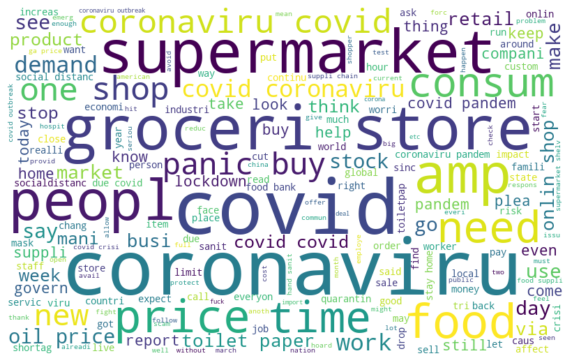

In [216]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['Tweet'][df['Sentiment'] == 'Negative']])
wordcloud = WordCloud(width=800, height=500,background_color="white", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

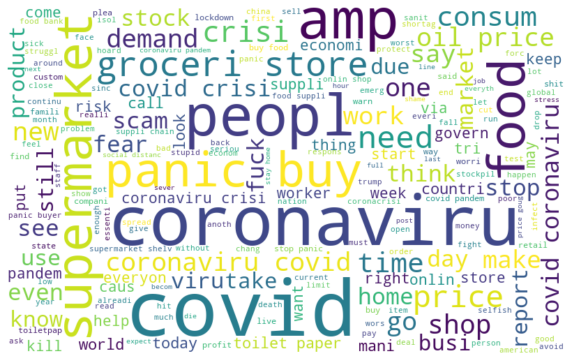

In [217]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['Tweet'][df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500,background_color="white", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**B) Understanding the impact of Hashtags on tweets sentiment**

In [218]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [219]:
# extracting hashtags from non racist/sexist tweets
HT_Extremely_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Positive'])
HT_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Positive'])
HT_Neutral = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Neutral'])
HT_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Negative'])
HT_Extremely_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Negative'])

In [220]:
# unnesting list
HT_Extremely_Positive = sum(HT_Extremely_Positive, [])
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])
HT_Extremely_Negative = sum(HT_Extremely_Negative,[])

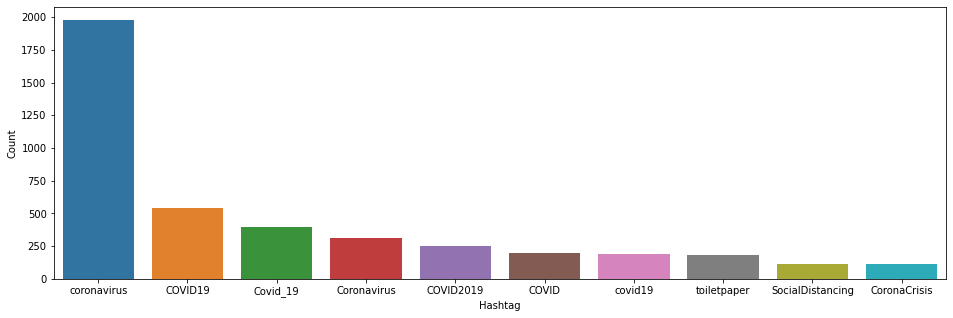

In [221]:
# making frequency distribution top 10 Extremely Positive hashtags
a = nltk.FreqDist(HT_Extremely_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

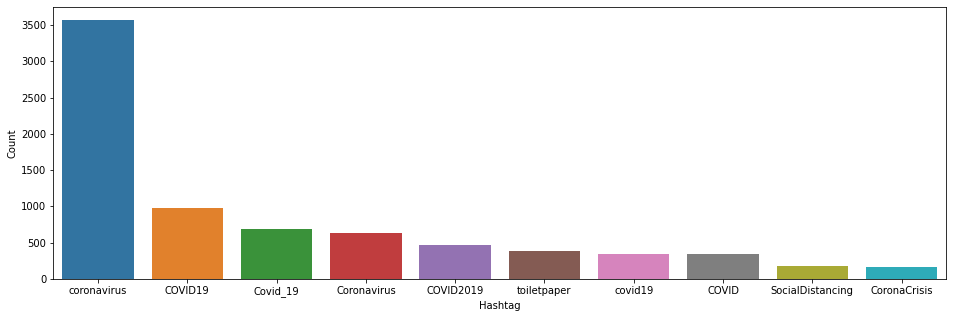

In [222]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

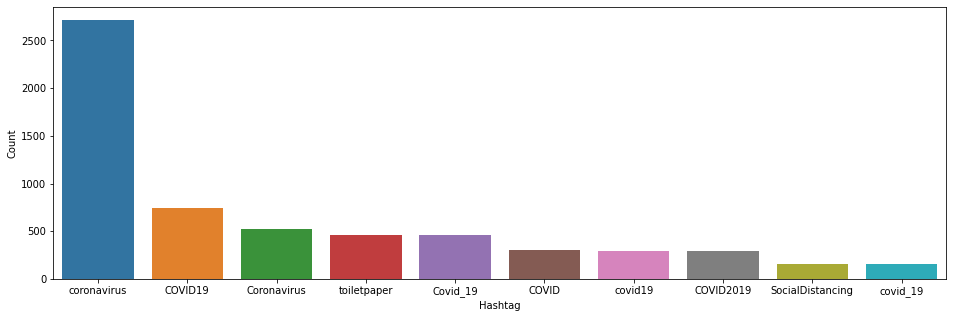

In [223]:
# making frequency distribution top 10 Neutral hashtags
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

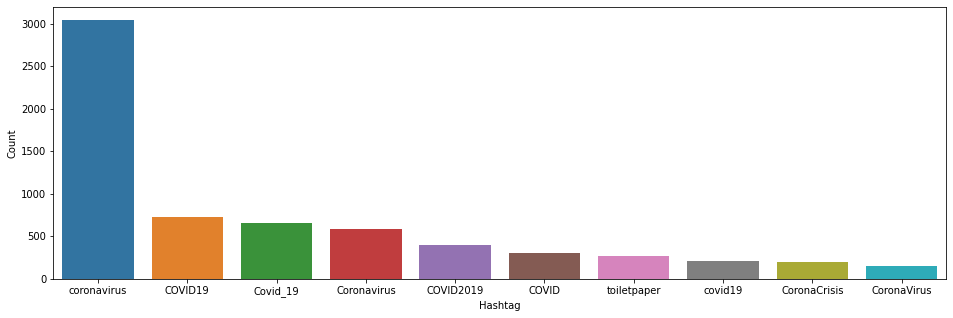

In [224]:
# making frequency distribution top 10 Negative hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

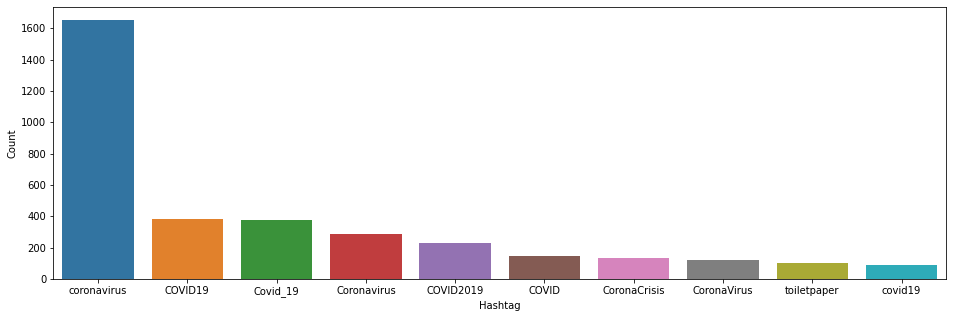

In [225]:
# making frequency distribution top 10 Extremely Negative hashtags
a = nltk.FreqDist(HT_Extremely_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#**Extracting Features from Cleaned Tweets**

In [226]:
new_df = df[['Tweet','Sentiment']]

In [227]:
new_df.head()

,Tweet,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med order,Positive
2,coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak,Positive
3,food stock one empti pleas panic enough food everyon take need stay calm stay safe #covid franc #covid #covid #coronaviru #confin #confinementot #confinementgener,Positive
4,readi supermarket #covid outbreak paranoid food stock litterali empti #coronaviru seriou thing pleas panic caus shortag #coronavirusfr #restezchezv #stayathom #confin,Extremely Negative


In [228]:
new_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

# Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [229]:
from sklearn.model_selection import train_test_split
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) 
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


# Use Of Counter Vectorizer For Multi Class Classification

In [230]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 28664)
X_train.shape :  (8232, 28664)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# Naive Bayes Classifier for MULTICLASS Classification

In [231]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.6987395596051632
Validation accuracy Score :  0.47862001943634597
                    precision    recall  f1-score   support

Extremely Negative       0.38      0.57      0.45       725
Extremely Positive       0.40      0.58      0.47       896
          Negative       0.52      0.43      0.47      2396
           Neutral       0.37      0.67      0.47       854
          Positive       0.62      0.42      0.50      3361

          accuracy                           0.48      8232
         macro avg       0.45      0.53      0.47      8232
      weighted avg       0.52      0.48      0.48      8232



# Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [232]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.8399696279422931
Validation accuracy Score :  0.5736151603498543
                    precision    recall  f1-score   support

Extremely Negative       0.69      0.61      0.65      1248
Extremely Positive       0.70      0.65      0.67      1421
          Negative       0.42      0.50      0.46      1667
           Neutral       0.76      0.60      0.67      1959
          Positive       0.45      0.53      0.49      1937

          accuracy                           0.57      8232
         macro avg       0.60      0.58      0.59      8232
      weighted avg       0.60      0.57      0.58      8232



# RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [233]:
rf_clf=RandomForestClassifier()

rf_clf.fit(X_train,y_train)
rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9996962794229309
Validation accuracy Score :  0.5750728862973761
                    precision    recall  f1-score   support

Extremely Negative       0.39      0.70      0.50       607
Extremely Positive       0.36      0.71      0.48       674
          Negative       0.56      0.53      0.54      2092
           Neutral       0.77      0.64      0.70      1868
          Positive       0.67      0.51      0.58      2991

          accuracy                           0.58      8232
         macro avg       0.55      0.62      0.56      8232
      weighted avg       0.62      0.58      0.58      8232



# Extreme Gradient Boosting ( For Multiclass Classification)

In [234]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.5097949886104783
Validation accuracy Score :  0.4924684159378037
                    precision    recall  f1-score   support

Extremely Negative       0.39      0.62      0.48       676
Extremely Positive       0.42      0.66      0.51       846
          Negative       0.37      0.49      0.42      1499
           Neutral       0.64      0.47      0.54      2111
          Positive       0.59      0.43      0.50      3100

          accuracy                           0.49      8232
         macro avg       0.48      0.54      0.49      8232
      weighted avg       0.53      0.49      0.50      8232



# Support vector machine( For Multiclass Classification)

In [235]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.905542900531511
Validation accuracy Score :  0.614067055393586
                    precision    recall  f1-score   support

Extremely Negative       0.50      0.72      0.59       754
Extremely Positive       0.53      0.77      0.63       917
          Negative       0.58      0.56      0.57      2046
           Neutral       0.71      0.66      0.68      1677
          Positive       0.68      0.55      0.61      2838

          accuracy                           0.61      8232
         macro avg       0.60      0.65      0.62      8232
      weighted avg       0.63      0.61      0.61      8232



# Logistic Regression(For Multiclass Classification)

In [236]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.8953075170842825
Validation accuracy Score :  0.6152818270165209
                    precision    recall  f1-score   support

Extremely Negative       0.62      0.67      0.65      1021
Extremely Positive       0.62      0.72      0.67      1152
          Negative       0.54      0.56      0.55      1913
           Neutral       0.72      0.65      0.68      1711
          Positive       0.60      0.57      0.58      2435

          accuracy                           0.62      8232
         macro avg       0.62      0.63      0.63      8232
      weighted avg       0.62      0.62      0.62      8232



# CATBOOST MODEL (For Multiclass Classification)

In [237]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [238]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [239]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [240]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.6728321943811694
Validation accuracy Score :  0.6269436345966958
                    precision    recall  f1-score   support

Extremely Negative       0.55      0.71      0.62       859
Extremely Positive       0.56      0.78      0.65       951
          Negative       0.54      0.59      0.56      1796
           Neutral       0.80      0.61      0.70      2016
          Positive       0.66      0.58      0.62      2610

          accuracy                           0.63      8232
         macro avg       0.62      0.65      0.63      8232
      weighted avg       0.65      0.63      0.63      8232



# All the multiclass models test accuracy in descending order

In [241]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
6,CatBoost,0.626944
1,Logistic Regression,0.615282
0,Support Vector Machines,0.614067
2,Random Forest,0.575073
4,Stochastic Gradient Decent,0.573615
5,XGBoost,0.492468
3,Naive Bayes,0.478620


#  **CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION**

In [242]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [243]:
bi_df=df[['Tweet','Sentiment']]
bi_df.head()

,Tweet,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med order,Positive
2,coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak,Positive
3,food stock one empti pleas panic enough food everyon take need stay calm stay safe #covid franc #covid #covid #coronaviru #confin #confinementot #confinementgener,Positive
4,readi supermarket #covid outbreak paranoid food stock litterali empti #coronaviru seriou thing pleas panic caus shortag #coronavirusfr #restezchezv #stayathom #confin,Extremely Negative


In [244]:
sentiment_dict={'Positive':1,'Extremely Positive':1,'Neutral':1,'Negative':0,'Extremely Negative':0}

In [245]:
bi_df["Sentiment"]= bi_df["Sentiment"].replace(sentiment_dict)

In [246]:
bi_df.head()

,Tweet,Sentiment
0,,1
1,advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med order,1
2,coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak,1
3,food stock one empti pleas panic enough food everyon take need stay calm stay safe #covid franc #covid #covid #coronaviru #confin #confinementot #confinementgener,1
4,readi supermarket #covid outbreak paranoid food stock litterali empti #coronaviru seriou thing pleas panic caus shortag #coronavirusfr #restezchezv #stayathom #confin,0


In [247]:
bi_df['Sentiment'].value_counts() 

1    25759
0    15398
Name: Sentiment, dtype: int64

In [248]:
X = bi_df.drop('Sentiment', axis=1)
y = bi_df.Sentiment

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [249]:
from sklearn.model_selection import train_test_split
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
train,valid = train_test_split(bi_df,test_size = 0.2,random_state=0,stratify = bi_df.Sentiment.values) 
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


# USING COUNT VECTORIZER

In [250]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 28821)
X_train.shape :  (8232, 28821)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.

In [251]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.859832953682612
Validation accuracy Score :  0.7892371234207969
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2913
           1       0.85      0.82      0.83      5319

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.77      8232
weighted avg       0.79      0.79      0.79      8232



# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [252]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9999088838268793
Validation accuracy Score :  0.8316326530612245
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      2674
           1       0.90      0.84      0.87      5558

    accuracy                           0.83      8232
   macro avg       0.81      0.83      0.81      8232
weighted avg       0.84      0.83      0.83      8232



# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [253]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9410174639331814
Validation accuracy Score :  0.8607871720116618
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2798
           1       0.92      0.87      0.89      5434

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



# CATBOOST ALGORITHM FOR BINARY CLASSIFICATION

In [254]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [255]:
catboost_prediction = clf2.predict(X_valid) 
catboost_accuracy = accuracy_score(y_valid,catboost_prediction) 
print("Training accuracy Score    : ",clf2.score(X_train,y_train)) 
print("Validation accuracy Score : ",catboost_accuracy ) 
print(classification_report(catboost_prediction,y_valid)) 

Training accuracy Score    :  0.8859225512528474
Validation accuracy Score :  0.8534985422740525
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      2606
           1       0.93      0.85      0.89      5626

    accuracy                           0.85      8232
   macro avg       0.83      0.86      0.84      8232
weighted avg       0.87      0.85      0.86      8232



# XG BOOST( BINARY CLASSIFICATION)

In [256]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy)
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.7454821564160972
Validation accuracy Score :  0.7414965986394558
              precision    recall  f1-score   support

           0       0.38      0.84      0.53      1400
           1       0.96      0.72      0.82      6832

    accuracy                           0.74      8232
   macro avg       0.67      0.78      0.67      8232
weighted avg       0.86      0.74      0.77      8232



# SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [257]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9595140470766894
Validation accuracy Score :  0.8442662779397473
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      2478
           1       0.93      0.84      0.88      5754

    accuracy                           0.84      8232
   macro avg       0.81      0.85      0.83      8232
weighted avg       0.86      0.84      0.85      8232



# **Winner Model:**

# Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [258]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9388306757782839
Validation accuracy Score :  0.8641885325558795
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2916
           1       0.91      0.88      0.89      5316

    accuracy                           0.86      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



In [259]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

[[11115  1203]
 [  811 19796]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

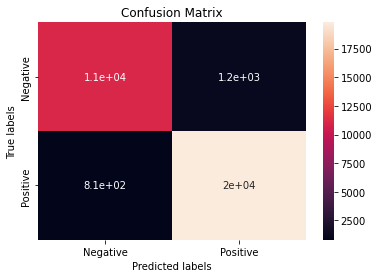

In [260]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [261]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred = sgd_clf.predict(X_valid)
# Let's check the overall accuracy
score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

# F1 score for our classifier
y_pred =  sgd_clf.predict(X_valid)
print('\nF1 score is',f1_score(y_valid,y_pred, average="macro"))

# Recall score for our winner model
print('\nRecall score is',recall_score(y_valid, y_pred, average='macro'))

# Classification Report for our stochastic gradient descent algorithm
print('\n',classification_report(y_valid,y_pred))


accuracy is 0.8641885325558795

F1 score is 0.8533703401299504

Recall score is 0.8496488565782043

               precision    recall  f1-score   support

           0       0.84      0.79      0.81      3080
           1       0.88      0.91      0.89      5152

    accuracy                           0.86      8232
   macro avg       0.86      0.85      0.85      8232
weighted avg       0.86      0.86      0.86      8232



# EVALUATION OF ALL BINARY CLASSIFICATION MODELS

**All the model test accuracy by descending order**

In [262]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values('Test accuracy', ascending=False)

,Model,Test accuracy
4,Stochastic Gradient Decent,0.864189
1,Logistic Regression,0.860787
6,CatBoost,0.853499
0,Support Vector Machines,0.844266
2,Random Forest,0.831633
3,Naive Bayes,0.789237
5,XGBoost,0.741497


# **Conclusion**

**For multiclass classification, the best model for this dataset would be CatBoost**

**For binary classification, the best model for this dataset would be Stochastic Gradient Descent.**
